In [39]:
from typing import Dict
import pandas as pd
import numpy as np
import random
from random import choices
import pdb
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.stats import poisson
from scipy.stats import gengamma
from collections import Counter
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx #for the powerlaw network
import csv

def build_networks(uniform, poisson, powerlaw):
    N: int = 1400 #number of users in the network
    mean_degree: int = 15
    
    if uniform == True:
        node_degrees: np.array = np.empty(N)
        node_degrees.fill(mean_degree)  
        node_degrees = node_degrees.astype(int)
        
    if poisson == True:
        node_degrees: np.array = np.random.poisson(lam=mean_degree, size=N) 
        node_degrees = node_degrees.astype(int)
    
    if powerlaw == True:
        G= nx.barabasi_albert_graph(N,1)
        degrees = dict(G.degree())
        node_degrees: np.array = np.empty(N)
        for i in range(N):
            node_degrees[i]=degrees[i]
        node_degrees = node_degrees.astype(int)
    
    node_ids: np.array = np.arange(N)
    adjacency_list = []
    
    for i in range(len(node_degrees)):
        adjacency_list1: Dict[int, np.array] = dict()
        adjacency_list.append(adjacency_list1)    
    
    for i in range(len(node_degrees)):
        adjacency_list[0][i] = np.random.choice(node_ids, node_degrees[i]) #random sample from node_ids with size=node_degrees1[meme_id]
    
    #print(adjacency_list)
    
    nets=[]
    nets.append(node_ids)
    nets.append(node_degrees)
    nets.append(adjacency_list)
    return nets

def simulate_networks(nets, form1, form2, scale1, scale2):
    node_ids=nets[0]
    node_degrees=nets[1]
    adjacency_list=nets[2]
    
    tick = 0
    tick_max: int = 60
    max_time: int = 400
    M: int = 500000 #5387880 - tamanho do dataset alemão
    meme_ids: np.array = np.arange(M)
    meme_sizes: np.array = np.zeros(M)
    meme_sizes = meme_sizes.astype(int)
    times: np.array = np.full(M, max_time)
    
    #dr = []
    #tp = []
    #at_tr = []
    
    for meme_id in tqdm(meme_ids):
        #print(meme_id, '/', len(meme_ids))
        time: int = times[meme_id]
        
        infected: np.array = np.random.choice(node_ids,1)
        exposed = []
        #plotinf = []
        
        tran_prob: float = gengamma.rvs(2*form1, form1, 0, scale1, size=1)[0]
        #decrease_rate: float = gengamma.rvs(a=ggd_a, c=ggd_c, loc=ggd_loc, scale=ggd_scale, size=1)[0] / 9
        decrease_rate: float = gengamma.rvs(2*form2, form2, 0.01, scale2, size=1)[0]
        #tran_prob: float = gengamma.rvs(a=ggd_a, c=ggd_c, loc=ggd_loc, scale=ggd_scale, size=1)[0] / 170
        #decrease_rate: float = gengamma.rvs(a=ggd_a, c=ggd_c, loc=ggd_loc, scale=ggd_scale, size=1)[0] / 9
        #decrease_rate: float = gengamma.rvs(a=ggd_a, c=ggd_c, loc=ggd_loc, scale=ggd_scale, size=1)[0] / 9
        #dr = np.append(dr, decrease_rate)
        #tp = np.append(tp, tran_prob)
        
        
        g = open("sim_memes_v10_3.txt", "a")
        
        for t in range(time):
            #f = open("sim_v6_cas4.txt", "a")
            
            transmission_probability: float = tran_prob * math.exp(-decrease_rate*t)
            
            #at_tr = np.append(at_tr, transmission_probability)
            
            for i in range(len(infected)):
                exposed=nets[2][0][infected[i]]
                number_infected: int = np.random.poisson(lam=1*transmission_probability * len(exposed), size=1)[0]
                #sem o fator multiplicativo não há nodos suficientes a serem selecionados para info se propagar
                
                if number_infected > 0:  
                    choice_number = min(number_infected, len(exposed))
                    choice = np.random.choice(exposed, choice_number, replace=False)
                    
                    for k in range(len(choice)):
                        if (choice[k] in infected)  == False:
                            infected = np.append(infected, choice[k])
                            tick = 0
                
                if tick>tick_max:
                    break
                
                tick = tick+1
                    
            #L = [str(t), " ",str(len(infected)), "\n"]
            #f.writelines(L)
            #f.close()
            #plotinf = np.append(plotinf, len(infected))
        
        meme_sizes[meme_id]= len(infected)
        
        L = [str(meme_id), " ", str(len(infected)), " ", str(tran_prob), " ", str(decrease_rate), "\n"]
        g.writelines(L)
        g.close()
        
        infected = []
        exposed = []
        
    #return meme_sizes, plotinf, dr, tp, at_tr
    return meme_sizes
        
nets = build_networks( False,  False, True) #1st - Uniform, 2nd Poisson, 3rd Powerlaw
#memes, infopl, dr, tp, at_tr = simulate_networks(nets, 2.5, 0.4, 0.01, 0.1) #The result from build_networks + the paramenters of the fitness
#memes = simulate_networks(nets, 2.5, 0.4, 0.01, 0.1) #The result from build_networks + the paramenters of the fitness
#f1 f2 s1 s2  abc: 2, 0.05, 0.5, 0.1
#memes = simulate_networks(nets, 2, 0.05, 0.5, 0.1)#abc
memes = simulate_networks(nets, 8, 0.5, 0.005, 0.05)
#The result from build_networks + the paramenters of the fitness

 19%|█▉        | 96563/500000 [07:52<38:31, 174.54it/s]  IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

 56%|█████▌    | 278916/500000 [22:58<14:29, 254.30it/s] IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

 89%|████████▉ | 445983/500000 [36:32<04:52, 184.59it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub

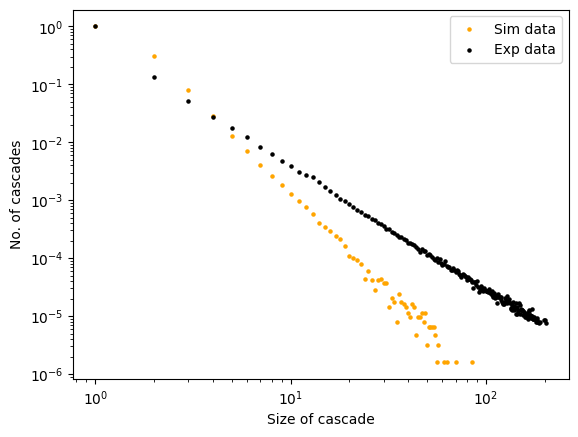

In [40]:
import pandas as pd
import numpy as np
import random
from random import choices
import pdb
import matplotlib.pyplot as plt
from scipy.stats import gengamma
from collections import Counter
import math
import matplotlib.pyplot as plt

#SIMULATION DATA
data1 = pd.read_csv('sim_memes_v10_3.txt', sep=" ", header=None)
data1.columns = ["iter", "size", "a_i", "d"]
counter1 = Counter(data1['size'])
sizes1 = np.array(list(counter1.keys()))
counts1 = np.array(list(counter1.values()))
max_val = max(counts1)
counts_norm1 = counts1/max_val
plt.scatter(sizes1,counts_norm1, color="orange", s=5, label = 'Sim data')

#EXPERIMENTAL DATA
data2 = pd.read_csv('cascade_distribution_de.csv', delim_whitespace=True)
x=np.array(data2.loc[:,"Size"])
y=data2.loc[:,"number"]
norm_y = y
max_val2 = max(y)
norm_y = norm_y/max_val2
plt.scatter(x, norm_y, color="black", s=5, label = 'Exp data')

#AESTHETIC CHANGES
plt.legend(scatterpoints=1, loc='upper right')
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Size of cascade")
plt.ylabel("No. of cascades")
#plt.savefig("sim_v6_3.png")
plt.show()

1.6243140952413134e-10


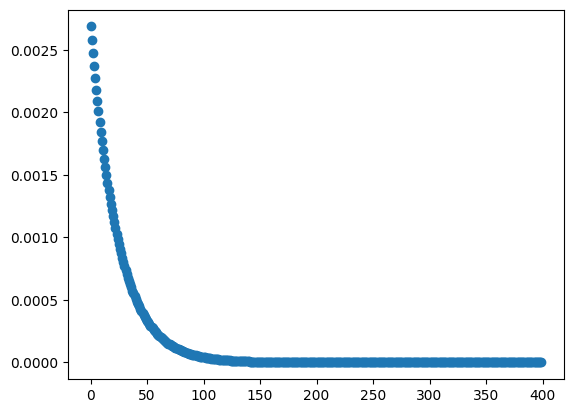

In [70]:
x = np.arange(len(at_tr))
print(at_tr[399])
    
plt.scatter(x,at_tr)

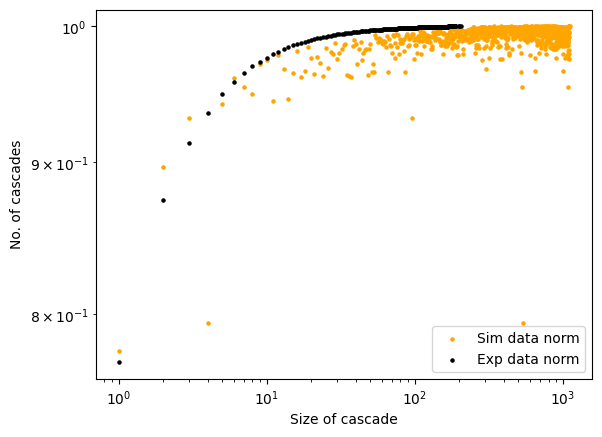

In [23]:
import pandas as pd
import numpy as np
import random
from random import choices
import pdb
import matplotlib.pyplot as plt
from scipy.stats import gengamma
from collections import Counter
import math
import matplotlib.pyplot as plt

#data1 = pd.read_csv('sim_memes_v4_de.txt', sep=" ", header=None)
data1 = pd.read_csv('sim_memes_v6_3.txt', sep=" ", header=None)
data1.columns = ["iter", "size", "a_i", "d", "a"]
counter1 = Counter(data1['size'])
sizes1 = np.array(list(counter1.keys()))
counts1 = np.array(list(counter1.values()))
counts1 = np.cumsum(counts1)

#plt.scatter(sizes1,counts1, color="orange", s=5, label = 'Sim data')

data2 = pd.read_csv('cascade_distribution_de.csv', delim_whitespace=True)
y=data2.loc[:,"number"]*sum(sizes1)/np.sum(data2.loc[:,"number"])
y=data2.loc[:,"number"]
norm_y = y
norm_y = np.cumsum(y)
#e=plt.scatter(data2.loc[:,"Size"], y, color="black", s=5, label = 'Exp data')

max_val1 = max(counts1)
max_val2 = max(y)
max_val = max(max_val1, max_val2)

counts_norm1 = counts1/max_val
norm_y = norm_y/max_val

plt.scatter(sizes1,counts_norm1, color="orange", s=5, label = 'Sim data norm')
f=plt.scatter(data2.loc[:,"Size"], norm_y, color="black", s=5, label = 'Exp data norm')

plt.legend(scatterpoints=1, loc='lower right')
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Size of cascade")
plt.ylabel("No. of cascades")
#plt.gca().set_xlim(right=1000)
#plt.gca().set_ylim(bottom=0.5)
#plt.savefig("sim_v6_3.png")
plt.show()

[4189178. 4189178. 4189178. ... 4189211. 4280467. 4189177.]
[4153402. 4153405. 4153405. 4153403. 4153401. 4153403. 4153405. 4153408.
 4153403. 4153403. 4153407. 4153410. 4153407. 4153407. 4153411. 4153425.
 4153409. 4153412. 4153414. 4153413. 4153420. 4153422. 4153407. 4153410.
 4153414. 4153417. 4153411. 4153410. 4153410. 4153414. 4153419. 4153420.
 4153414. 4153422. 4153422. 4153426. 4153424. 4153416. 4153435. 4153441.
 4153422. 4153421. 4153430. 4153416. 4153441. 4153415. 4153428. 4153422.
 4153433. 4153443. 4153423. 4153435. 4153428. 4153426. 4153441. 4153443.
 4153451. 4153444. 4153462. 4153441. 4153450. 4153443. 4153454. 4153437.
 4153439. 4153438. 4153442. 4153459. 4153450. 4153459. 4153459. 4153471.
 4153460. 4153440. 4153457. 4153468. 4153455. 4153473. 4153458. 4153481.
 4153466. 4153472. 4153474. 4153491. 4153477. 4153482. 4153483. 4153484.
 4153485. 4153497. 4153483. 4153488. 4153500. 4153505. 4153485. 4153480.
 4153501. 4153535. 4153514. 4153533. 4153532. 4153496. 4153532. 

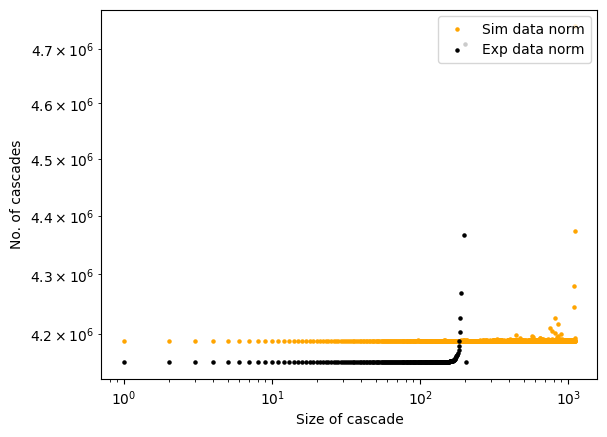

In [16]:
import pandas as pd
import numpy as np
import random
from random import choices
import pdb
import matplotlib.pyplot as plt
from scipy.stats import gengamma
from collections import Counter
import math
import matplotlib.pyplot as plt

#data1 = pd.read_csv('sim_memes_v4_de.txt', sep=" ", header=None)
data1 = pd.read_csv('sim_memes_v6_3.txt', sep=" ", header=None)
data1.columns = ["iter", "size", "a_i", "d", "a"]
counter1 = Counter(data1['size'])
sizes1 = np.array(list(counter1.keys()))
counts1 = np.array(list(counter1.values()))

counts_cumul = []
cumul_add = 0
add_for = 0

for i in range(len(counts1)):
    add_for = cumul_add + counts1[i]
    counts_cumul = np.append(add_for, counts_cumul)
    cumul_add = counts_cumul[i]

counts1 = counts_cumul

print(counts1)

#max_val = max(counts1)
#counts_norm1 = counts1/max_val
#plt.scatter(sizes1,counts1, color="orange", s=5, label = 'Sim data')
plt.scatter(sizes1,counts1, color="orange", s=5, label = 'Sim data norm')

data2 = pd.read_csv('cascade_distribution_de.csv', delim_whitespace=True)
y=data2.loc[:,"number"]

counts_cumul2 = []
cumul_add2 = 0
add_for2 = 0

for i in range(len(y)):
    add_for2 = cumul_add2 + y[i]
    counts_cumul2 = np.append(add_for2, counts_cumul2)
    cumul_add2 = counts_cumul2[i]
    
y = counts_cumul2

print(y)

norm_y = y
#max_val2 = max(y)
#norm_y = norm_y/max_val2
#e=plt.scatter(data2.loc[:,"Size"], y, color="black", s=5, label = 'Exp data')
f=plt.scatter(data2.loc[:,"Size"], y, color="black", s=5, label = 'Exp data norm')
plt.legend(scatterpoints=1, loc='upper right')

#plt.xlim([0,150])

plt.yscale("log")
plt.xscale("log")
plt.xlabel("Size of cascade")
plt.ylabel("No. of cascades")

plt.show()